In [20]:
from facebook_scraper import get_posts
import re
import pandas as pd
from time import gmtime, strftime
from nltk.corpus import stopwords
import arabic_reshaper
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display

In [21]:
stop_words = set(stopwords.words('arabic'))
timeCurrent=strftime("%Y-%m-%d %H:%M:%S", gmtime())
def confimTime(time):
    time=''+str(time)
    timeCurrentSt=''+str(timeCurrent)
    timeCurrentSt=re.split('\ ',timeCurrentSt)
    time=re.split('\ ',time)
    timeCurrentSt=re.split('\-',timeCurrentSt[0])
    time=re.split('\-',time[0])
    if int(timeCurrentSt[0])==int(time[0]) and int(timeCurrentSt[1])-int(time[1])<=2:
        return True
    if int(timeCurrentSt[0])-int(time[0])==1 and int(time[1])-int(timeCurrentSt[1])>=10:
        return True
    else :
        return False   

In [22]:
def getPosts(pages2):
    posts=' '
    dataClean=[]
    for page in pages2:
        for post in get_posts(page,pages=20):
            if confimTime(post['time']):
                if post['text'] !=' ':
                    
                    try:
                        
                        post=re.sub(r"<.*?>",' ',post['text'])
                        post=re.sub(r'[0-9]',' ',post)
                        post=re.sub(r'  ','',post)
                        post=re.sub(r'[a-zA-Z]',' ',post)
                        post=re.sub(r'\n',' ',post)
                        post=re.sub(r'[!.&é"''(-èê_çà)=$*ù^ù:;?#؟]',' ',post)
                        posts=posts+post
                    except : continue
                
                    
    text = re.findall(r'\w+', posts)
    #remove stops words
    for word in text:
        if word not in stop_words:
            dataClean.append(word)

    r= pd.DataFrame({'data':dataClean})
    r.to_csv("dataPostsFacebook.csv",index=False,encoding='utf-8-sig')

In [23]:
def show_wordcloud(data,title):
    data = arabic_reshaper.reshape(data)
    data = get_display(data) # add this line
    wordCloud = WordCloud(font_path='arial', background_color='white',mode='RGB', width=2000, height=1000).generate(data)
    plt.title(title)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.show()

In [24]:
def arrayToString(array):
    string=' '
    for index, row in array.iterrows():
        string=string+' '+row['data']
    return string 

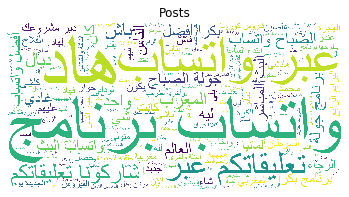

In [25]:
pages=['Hadoop','MapReduce','DA','2m.officiel','Medi1TV','Sawa']
getPosts(pages)
data=pd.read_csv('dataPosts.csv')
string=arrayToString(data)
show_wordcloud(string,'Posts')